In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set(font_scale=1.4)


# P-sites filtering

In [2]:
##################################################################################################################
Scop3Pall_Psites=pd.read_csv('Scop3P_allSites.txt',sep='\t') # all sites from Scop3P (PRIDE+UniProt) # file1
print ("All Scop3P P-sites: ", Scop3Pall_Psites.shape[0])

Scop3P_Pride_Psites=pd.read_csv('Scop3P_aggdatanewAll_STY1.txt',sep='\t') # only re-processed sites

print ("Total Reprocessed sites: ",Scop3P_Pride_Psites.shape[0])
print ("Total proteins from re-processed data:",Scop3P_Pride_Psites.ACC_ID.nunique())


All Scop3P P-sites:  106975
Total Reprocessed sites:  92453
Total proteins from re-processed data: 13437


Total #P-sites Scop3P PRIDE (92453, 14)
Combined        21045
Similarity       3858
Experimental      914
Name: Evidence, dtype: int64


Text(0, 0.5, 'P-site count')

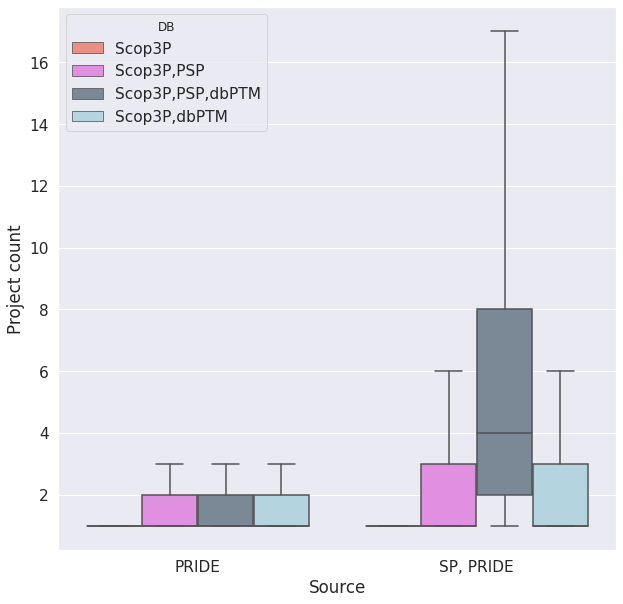

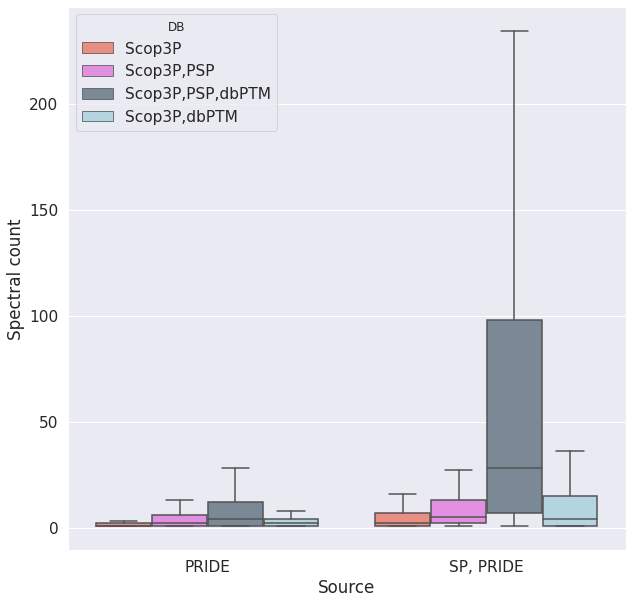

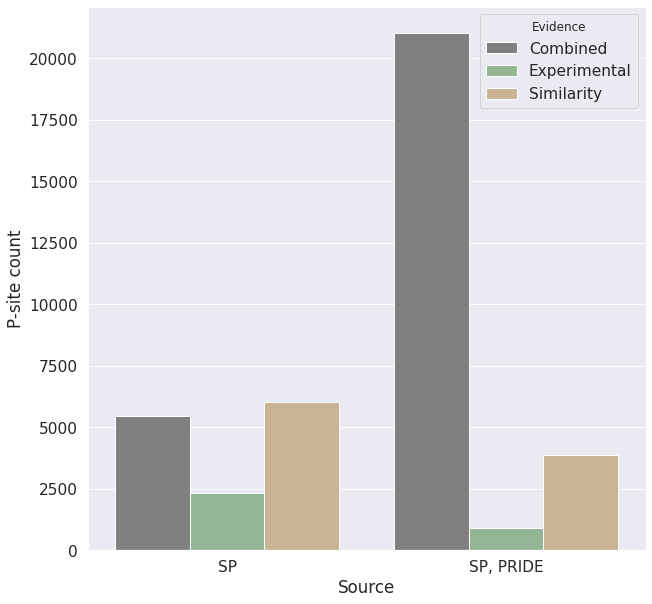

In [3]:
######################################
Scop3P_freq=pd.read_csv('Scop3P_Pride_pepevidence.txt',sep='\t')   # file 2

print ("Total #P-sites Scop3P PRIDE",Scop3P_freq.shape)
Scop3P_freq.Source.replace({"UP": "SP", "UP, PRIDE": "SP, PRIDE"}, inplace=True)

####################################################  Box plots of spectral and Project evidence
plt.figure(figsize=(10,10))
sns.boxplot(x="Source", y="#Projects",showfliers=False, hue='DB',data=Scop3P_freq,palette=['salmon','violet','lightslategray','lightblue'])
plt.ylabel("Project count")
plt.figure(figsize=(10,10))
sns.boxplot(x="Source", y="#Spectra", showfliers=False,hue='DB',data=Scop3P_freq,palette=['salmon','violet','lightslategray','lightblue'])
plt.ylabel("Spectral count")

#####################################################  Bar plot UniProt evidence

plt.figure(figsize=(10,10))

Scop3Pall_Psites.Source.replace({"UP": "SP", "UP, PRIDE": "SP, PRIDE"}, inplace=True)
print (Scop3Pall_Psites[Scop3Pall_Psites['Source']=='SP, PRIDE'].Evidence.value_counts())
sns.countplot(data=Scop3Pall_Psites[Scop3Pall_Psites['Source']!='PRIDE'],x='Source',hue='Evidence',palette=['gray','darkseagreen','tan','gray','darkseagreen','tan'])
plt.ylabel("P-site count")

dbPTM (257527, 2)
PSP (239026, 2)
############# Common P-sites in all DB ##########

P-sites in all DB (59406, 14)
PRIDE        34607
SP, PRIDE    24799
Name: Source, dtype: int64
################# Ps-ites only in Scop3P######

P-sites in Scop3p only (23488, 14)
PRIDE        23115
SP, PRIDE      373
Name: Source, dtype: int64
P-sites in Scop3p,PSP (4367, 14)
Scop3P,PSP    4367
Name: DB, dtype: int64
PRIDE        4153
SP, PRIDE     214
Name: Source, dtype: int64
P-sites in Scop3p,dbPTM (5192, 14)
Scop3P,dbPTM    5192
Name: DB, dtype: int64
PRIDE        4931
SP, PRIDE     261
Name: Source, dtype: int64


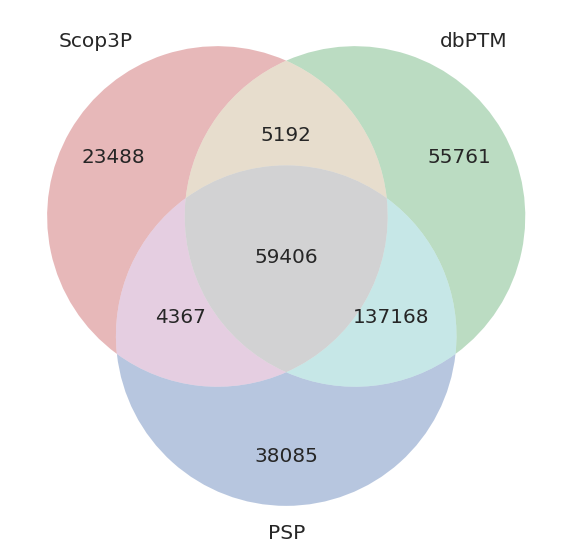

In [4]:
###################################################################### Re-processed sites statsictics
dbPTM=pd.read_csv('dbPTMsites.txt',sep='\t')
PSP=pd.read_csv('PSPsites.txt',sep='\t')
print ("dbPTM",dbPTM.shape)
print ("PSP",PSP.shape)

print ("############# Common P-sites in all DB ##########\n")
all_psites=Scop3P_freq[Scop3P_freq['DB']=='Scop3P,PSP,dbPTM']
print ("P-sites in all DB", all_psites.shape)
## in these sites how many are from PRIDE and how many are UP, or UP,PRIDE
print (all_psites['Source'].value_counts())

print ("################# Ps-ites only in Scop3P######\n")
Scop3p_psites=Scop3P_freq[Scop3P_freq['DB']=='Scop3P']
print ("P-sites in Scop3p only", Scop3p_psites.shape)
print (Scop3p_psites['Source'].value_counts())


Scop3p_PSP=Scop3P_freq[(Scop3P_freq['DB']=='Scop3P,PSP')]
print ("P-sites in Scop3p,PSP", Scop3p_PSP.shape)
print (Scop3p_PSP['DB'].value_counts())
print (Scop3p_PSP['Source'].value_counts())

Scop3p_dbPTM=Scop3P_freq[(Scop3P_freq['DB']=='Scop3P,dbPTM')]
print ("P-sites in Scop3p,dbPTM", Scop3p_dbPTM.shape)
print (Scop3p_dbPTM['DB'].value_counts())
print (Scop3p_dbPTM['Source'].value_counts())

###### VENN diagram overall plot Scop3P, dbPTM, PSP (applied filtering of Swissprot deprectated entries )
from matplotlib_venn import *
plt.figure(figsize=(10,10))

ven=venn3_unweighted(subsets = (23488, 55761, 5192, 38085,4367, 137168,59406), set_labels = ('Scop3P', 'dbPTM', 'PSP'))
for t in ven.subset_labels: t.set_fontsize(20)


## NSAF analysis

Perason coorelation values (0.3804418192847277, 0.0)
             index  protein count
3   PXD006482_NSAF           7038
4   PXD003657_NSAF            349
5   PXD000612_NSAF          12062
6   PXD000474_NSAF           2090
7   PXD002394_NSAF           2691
8   PXD004447_NSAF           4736
9   PXD004415_NSAF           5320
10  PXD003709_NSAF             47
11  PXD001374_NSAF           4725
12  PXD003215_NSAF           1838
13  PXD000680_NSAF           4615
14  PXD003660_NSAF            101
15  PXD004940_NSAF           6471
16  PXD005366_NSAF           7458
17  PXD001565_NSAF           4243
18  PXD001550_NSAF           4869
19  PXD001546_NSAF           3417
20  PXD000964_NSAF            505
21  PXD001333_NSAF           9204
22  PXD002057_NSAF           2246
23  PXD002255_NSAF           3448
24  PXD001060_NSAF           8479
25  PXD003198_NSAF           3931
26  PXD006114_NSAF             54
27  PXD004452_NSAF          13015
28  PXD000836_NSAF           2327
29  PXD000218_NSAF           

<AxesSubplot:title={'center':'Number of phospho preotins across projects'}, xlabel='index'>

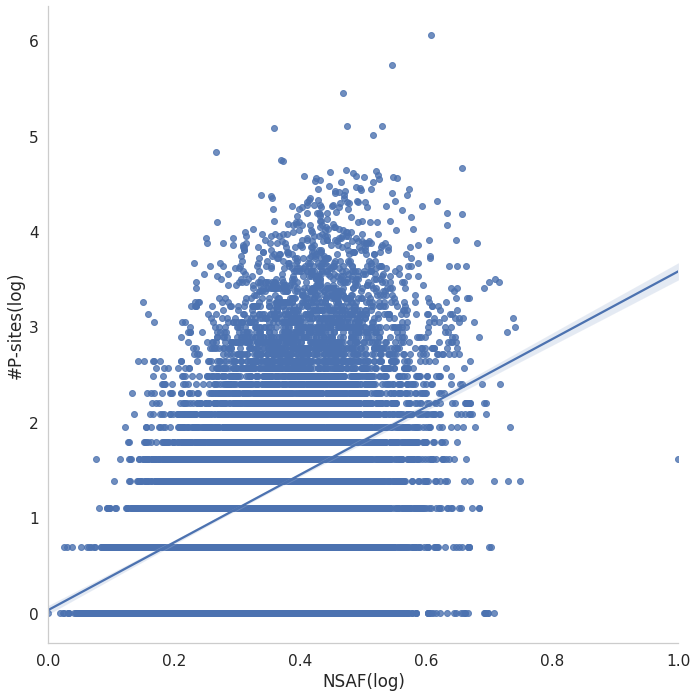

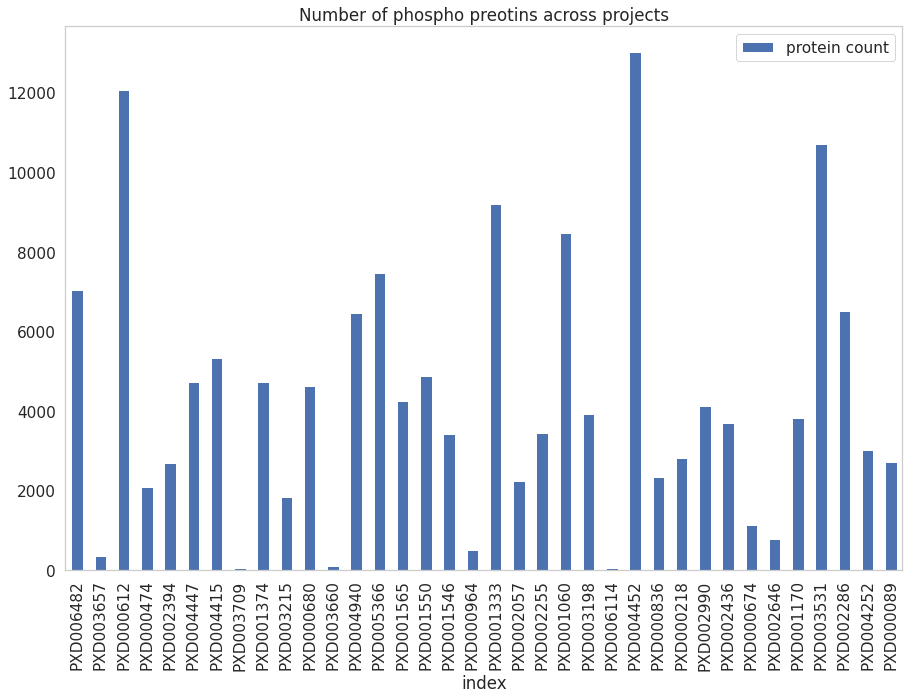

In [5]:
################################################### NSAF analysis
NSAF=pd.read_csv('Scop3P_NSAF_file_for_proteins_selection.txt',sep='\t',usecols=['ACC_ID','NSAF_log_norm','#P-sites_log'])
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y="#P-sites_log", x="NSAF_log_norm", data=NSAF,height=10)
plt.xlabel("NSAF(log)")
plt.ylabel("#P-sites(log)")

### Pearson correlation
from scipy.stats import pearsonr
NSAF_dat = NSAF[['#P-sites_log', 'NSAF_log_norm']].dropna()
print ("Perason coorelation values",pearsonr(NSAF_dat['#P-sites_log'], NSAF_dat['NSAF_log_norm']))

##################################################################### Projects and proteins plot
PROJstat=pd.read_csv('Scop3P_NSAF.txt',sep='\t')
countProj=PROJstat.count().reset_index(name='protein count')    #Overall_project_proteins_stat
countProj= countProj.iloc[3:]
print (countProj.head(30))
countProj['index'] = countProj['index'].str[:-5]

countProj.plot.bar(x="index", y="protein count", rot=90, title="Number of phospho preotins across projects",figsize=(15,10))
# plt.yscale('log')



## Five stage filtering

In [6]:
singleProjSites=pd.read_csv('SingleProjsites.txt',sep='\t')
print (singleProjSites.shape)

(51270, 9)


In [7]:
########################################################### See how the Scop3P only sites are in terms of distance

scop3ponly=singleProjSites[singleProjSites['DB']=='Scop3P']
print ("Total sites in Scop3P only",scop3ponly.shape[0])
greysitesDF=Scop3P_Pride_Psites.merge(scop3ponly[['ACC_ID','UP_POS','loc_prob','S/M']],on=['ACC_ID','UP_POS'])
print (greysitesDF.shape)




Total sites in Scop3P only 21068
(21068, 36)


S1    15942
S2     5126
Name: S, dtype: int64
total groups in the data (102, 3)
colorcat
green    10019
grey     11049
Name: counts, dtype: int64


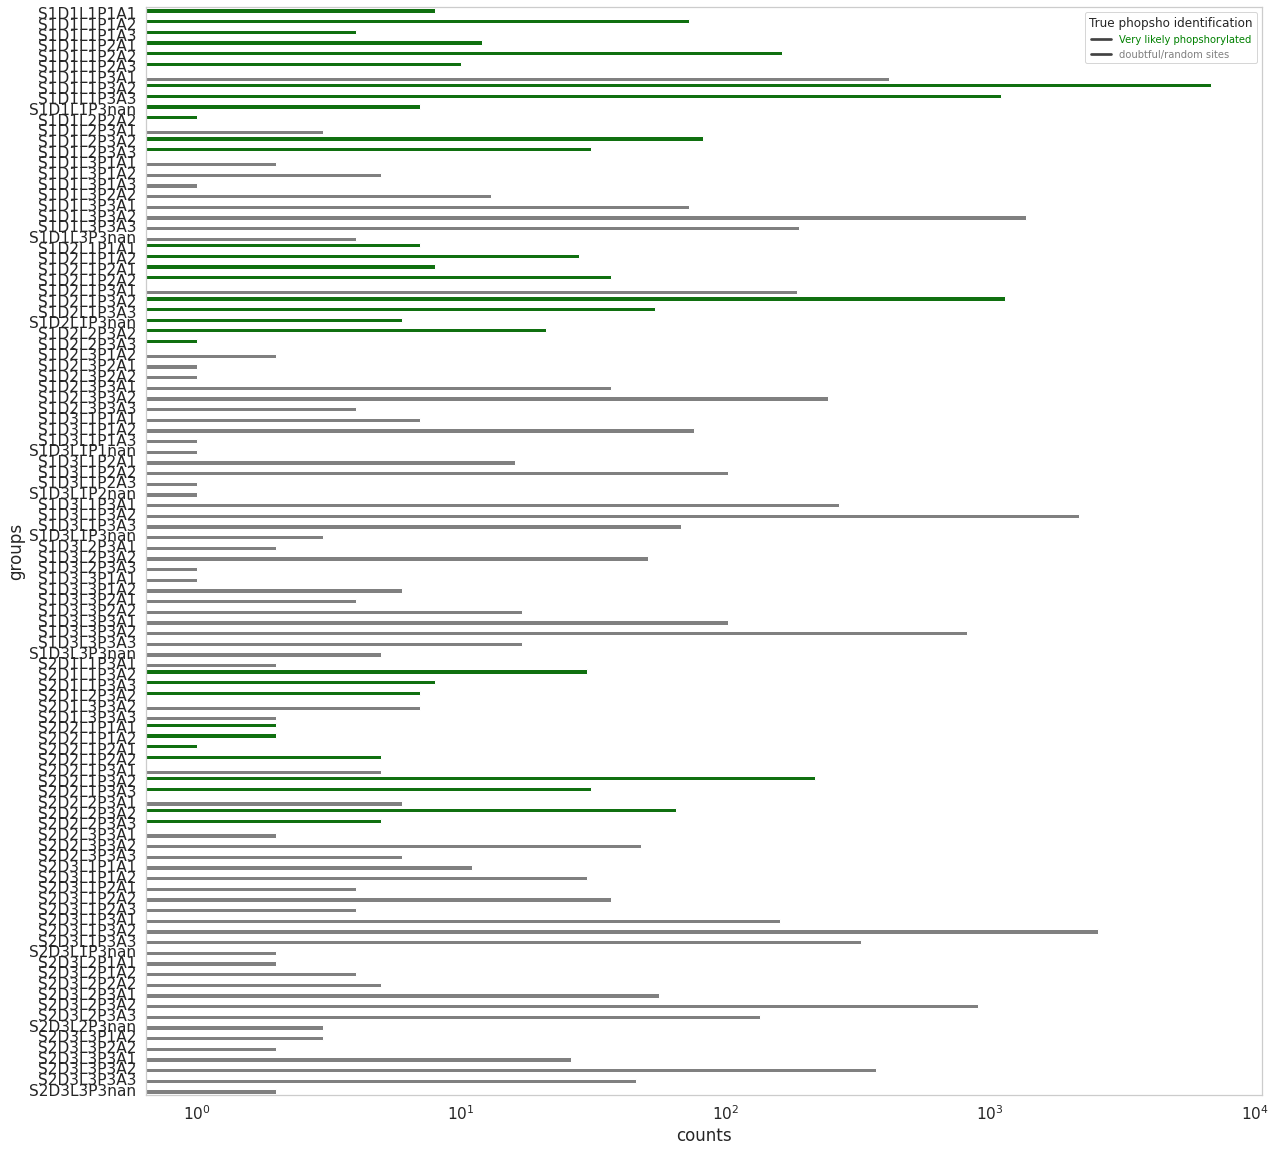

In [8]:
####################################### Bin values on loc.prob and phosphodist to see the jump possibility
####################################### Take all grey sites 21068 sites

greysitesDF_Grp=greysitesDF.copy()
greysitesDF_Grp['phospho_dist_x'].fillna(100, inplace=True) # replace phospho distnace nan with max value 100
                                                          # beccoz if thats the only P-site for a protein we dont have dist info
bins = [0,50,70,100]
greysitesDF_Grp['L'] = pd.cut(greysitesDF_Grp['loc_prob'].values, bins,labels=["L3","L2","L1"])

bins=[0,5,10,np.inf]
greysitesDF_Grp['P'] = pd.cut(greysitesDF_Grp['P-freq'].values, bins,labels=["P3","P2","P1"])


bins=[0,10,20,np.inf]
greysitesDF_Grp['D'] = pd.cut(greysitesDF_Grp['phospho_dist_x'].values, bins,labels=["D3","D2","D1"])
### change S/M to 0 and 1 fr bins
greysitesDF_Grp["S/M_y"].replace({"*": 0, "**": 1}, inplace=True)
bins=[-1,0,1]
greysitesDF_Grp['S'] = pd.cut(greysitesDF_Grp['S/M_y'].values, bins,labels=["S1","S2"])
print (greysitesDF_Grp['S'].value_counts())

####################################################### protein abundance
greysitesDF_Grp=greysitesDF_Grp.merge(NSAF[['ACC_ID','NSAF_log_norm']],on='ACC_ID')


bins=[greysitesDF_Grp['NSAF_log_norm'].min(),0.2,0.5,greysitesDF_Grp['NSAF_log_norm'].max()]

greysitesDF_Grp['A']= pd.cut(greysitesDF_Grp['NSAF_log_norm'].values, bins,labels=["A3","A2","A1"])


greysitesDF_Grp['group']=greysitesDF_Grp['S'].astype(str)+greysitesDF_Grp['D'].astype(str)+greysitesDF_Grp['L'].astype(str)+greysitesDF_Grp['P'].astype(str)+greysitesDF_Grp['A'].astype(str)


############# count values add colors to DF to differentiate green: reliable, grey: needs to be validated


newDF=greysitesDF_Grp.group.value_counts().rename_axis('groups').reset_index(name='counts')
newDF['colorcat']= np.where(newDF['groups'].isin(['S1D1L1P1A1','S1D1L1P1A2','S1D1L1P1A3','S1D1L1P2A1','S1D1L1P2A2',\
                                                  'S1D1L1P2A3','S1D1L1P3A2','S1D1L1P3A3','S1D1L1P3nan','S1D1L2P2A2',\
                                                'S1D1L2P3A2','S1D1L2P3A3','S1D2L1P1A2','S1D2L1P1A3','S1D2L1P2A2',\
                                                'S1D2L1P1A1','S1D2L1P2A3','S1D2L1P3A2','S1D2L1P3A3','S1D2L1P3nan',\
                                                  'S2D2L1P1A1','S2D2L1P2A1','S1D2L2P3A2',\
                                                'S1D2L1P2A1','S2D1L1P3A2','S2D1L1P3A3','S2D1L2P3A2','S2D2L1P1A2','S2D2L1P1A3',\
                                              'S1D2L2P3A3','S2D2L1P2A2','S2D2L1P2A3','S2D2L1P3A2','S2D2L1P3A3','S2D2L2P3A2','S2D2L2P3A3']), 'green','grey')

newDF=newDF.sort_values(by='groups',ascending=True)
print ("total groups in the data",newDF.shape)
sns.set_style("whitegrid", {'axes.grid' : False})             

plt.figure(figsize=(20,20))

sns.barplot(data=newDF,x='counts',y='groups',hue='colorcat',palette=['green','grey'],log=True) #grey_sites.png

plt.legend(title='True phopsho identification', loc='upper right', labels=['Very likely phopshorylated', 'doubtful/random sites'],labelcolor=['green','grey'],fontsize=10)
# 
plt.rcParams["axes.labelsize"] = 12

print (newDF.groupby('colorcat')['counts'].agg('sum'))

In [9]:
################################################################### Filter pout these grey sites from analysis
greysiteslist='S1D1L1P1A1','S1D1L1P1A2','S1D1L1P1A3','S1D1L1P2A1','S1D1L1P2A2','S1D1L1P2A3','S1D1L1P3A2',\
'S1D1L1P3A3','S1D1L1P3nan','S1D1L2P2A2','S1D1L2P3A2','S1D1L2P3A3','S1D2L1P1A2','S1D2L1P1A3','S1D2L1P2A2'\
,'S1D2L1P1A1','S1D2L1P2A3','S1D2L1P3A2','S1D2L1P3A3','S1D2L1P3nan','S2D2L1P1A1','S2D2L1P2A1',\
'S1D2L2P3A2','S1D2L1P2A1','S2D1L1P3A2','S2D1L1P3A3','S2D1L2P3A2','S2D2L1P1A2','S2D2L1P1A3',\
'S1D2L2P3A3','S2D2L1P2A2','S2D2L1P2A3','S2D2L1P3A2','S2D2L1P3A3','S2D2L2P3A2','S2D2L2P3A3'

greysitesDF_Grp_filt=greysitesDF_Grp[~greysitesDF_Grp['group'].isin(greysiteslist)]
# greysitesDF_Grp_filt[['ACC_ID','UP_POS']].to_csv('Scop3P_grey_sites.txt',sep='\t',index=False)

# Final confident/reliable P-sites

In [39]:
Scop3P_confident_Sites=Scop3P_Pride_Psites.merge(greysitesDF_Grp_filt[['ACC_ID','UP_POS']],how='left',indicator=True)
Scop3P_confident_Sites=Scop3P_confident_Sites[Scop3P_confident_Sites['_merge']=='left_only']
print ("Filtered reliable sites: ",Scop3P_confident_Sites.shape[0]) ### These sites were only used for further analysis

Filtered reliable sites:  81404


In [41]:
Scop3P_confident_Sites=Scop3P_confident_Sites[['ACC_ID','UP_POS','DB','STY_count','Modification_name','SEQ_length','countS','countT','countY']]

In [34]:
###################################################################################
numPsites=Scop3P_confident_Sites.groupby(['ACC_ID']).size().reset_index(name='#Psites')
numPsitesS=(Scop3P_confident_Sites.groupby(['ACC_ID']).apply(lambda x: (x['Modification_name']== 'PhosphoS').sum()).reset_index(name='#pS'))
numPsitesT=(Scop3P_confident_Sites.groupby(['ACC_ID']).apply(lambda x: (x['Modification_name']== 'PhosphoT').sum()).reset_index(name='#pT'))
numPsitesY=(Scop3P_confident_Sites.groupby(['ACC_ID']).apply(lambda x: (x['Modification_name']== 'PhosphoY').sum()).reset_index(name='#pY'))


numPsitesall=numPsitesS.merge(numPsitesT,on=['ACC_ID']).merge(numPsitesY,on=['ACC_ID'])

aggregation_functions = {'#pS': 'sum', '#pT': 'sum','#pY':'sum'}
df_new = numPsitesall.groupby(['ACC_ID'],as_index=False).aggregate(aggregation_functions).reindex(columns=numPsitesall.columns)
Psites=numPsites.merge(df_new,on=['ACC_ID'])


# ##############################################################################################################

# Scop3P_filter=datasub2[['ACC_ID','#P-sites' ,'Perc.Psites','SEQ_length']]
Scop3P_confident_Sites=Psites.merge(Scop3P_confident_Sites,on='ACC_ID')

Scop3P_confident_Sites['Perc_pS']=Scop3P_confident_Sites['#pS']/Scop3P_confident_Sites['countS']*100
Scop3P_confident_Sites['Perc_pT']=Scop3P_confident_Sites['#pT']/Scop3P_confident_Sites['countT']*100
Scop3P_confident_Sites['Perc_pY']=Scop3P_confident_Sites['#pY']/Scop3P_confident_Sites['countY']*100
Scop3P_confident_Sites['Perc.Psites']=Scop3P_confident_Sites['#Psites']/Scop3P_confident_Sites['STY_count']*100


print (Scop3P_confident_Sites.shape)

(81404, 17)


(12632, 7) (13437, 3)


Text(0, 0.5, 'Density (proteins)')

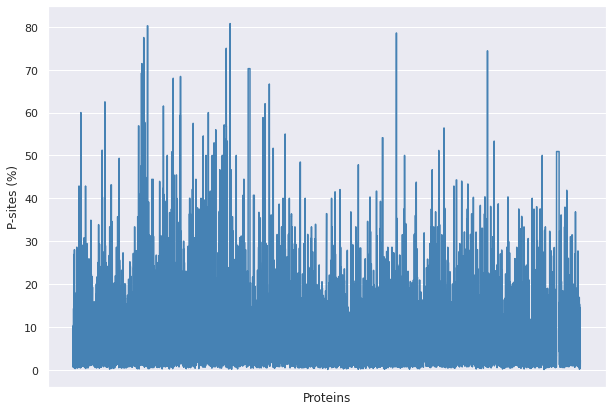

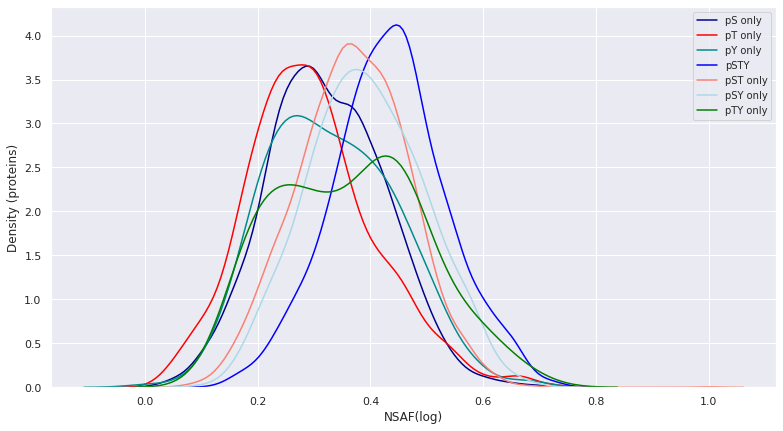

In [35]:
sns.set(style="darkgrid")   
plt.figure(figsize=(10,7))
plt.plot(range(Scop3P_confident_Sites.shape[0]),Scop3P_confident_Sites['Perc.Psites'],color='steelblue') #Proteins_percentage.png
# Scop3Pall['Perc.Psites'].plot(kind='bar')
plt.xlabel("Proteins")
plt.ylabel("P-sites (%)")
plt.xticks([])



Scop3P_NSAF=Scop3P_confident_Sites[['ACC_ID','#pS','#pT','#pY']].drop_duplicates().merge(NSAF,on='ACC_ID').reset_index()
print (Scop3P_NSAF.shape,NSAF.shape)

onlyS=Scop3P_NSAF[(Scop3P_NSAF['#pT']==0)&(Scop3P_NSAF['#pY']==0)]
onlyT=Scop3P_NSAF[(Scop3P_NSAF['#pS']==0)&(Scop3P_NSAF['#pY']==0)]
onlyY=Scop3P_NSAF[(Scop3P_NSAF['#pS']==0)&(Scop3P_NSAF['#pT']==0)]
noPhos=Scop3P_NSAF[(Scop3P_NSAF['#pT']==0)&(Scop3P_NSAF['#pY']==0)&(Scop3P_NSAF['#pS']==0)]
allPhos=Scop3P_NSAF[(Scop3P_NSAF['#pT']>0)&(Scop3P_NSAF['#pY']>0)&(Scop3P_NSAF['#pS']>0)]
STphos=Scop3P_NSAF[(Scop3P_NSAF['#pT']>0)&(Scop3P_NSAF['#pY']==0)&(Scop3P_NSAF['#pS']>0)]
SYphos=Scop3P_NSAF[(Scop3P_NSAF['#pT']==0)&(Scop3P_NSAF['#pY']>0)&(Scop3P_NSAF['#pS']>0)]
TYphos=Scop3P_NSAF[(Scop3P_NSAF['#pT']>0)&(Scop3P_NSAF['#pY']>0)&(Scop3P_NSAF['#pS']==0)]
plt.figure(figsize=(13,7))
sns.set(style='darkgrid')   #NSAF_proteins_S_T_ST
sns.kdeplot(onlyS['NSAF_log_norm'],color='darkblue',label='pS only')

sns.kdeplot(onlyT['NSAF_log_norm'],color='red',label='pT only')
sns.kdeplot(onlyY['NSAF_log_norm'],color='darkcyan',label='pY only')
sns.kdeplot(allPhos['NSAF_log_norm'],color='blue',label='pSTY')
sns.kdeplot(STphos['NSAF_log_norm'],color='salmon',label='pST only')
sns.kdeplot(SYphos['NSAF_log_norm'],color='lightblue',label='pSY only')
sns.kdeplot(TYphos['NSAF_log_norm'],color='green', label='pTY only')
plt.legend(fontsize='small')
plt.xlabel('NSAF(log)')
plt.ylabel('Density (proteins)')

(12632, 5)
(4408, 5)
[4408, 1145, 431, 2181, 3484, 850, 133]
[4428, 1165, 451, 2201, 3504, 870, 153]
(0, 5) (2181, 5) (4408, 5) (1145, 5) (431, 5) (3484, 5) (850, 5) (133, 5)
   index    bin
0    <10  10014
1  11-20   1844
2  21-30    500
3  31-40    174
4  41-50     59
5    >50     41


Text(0, 0.5, 'Phosphorylation occupancy (%)')

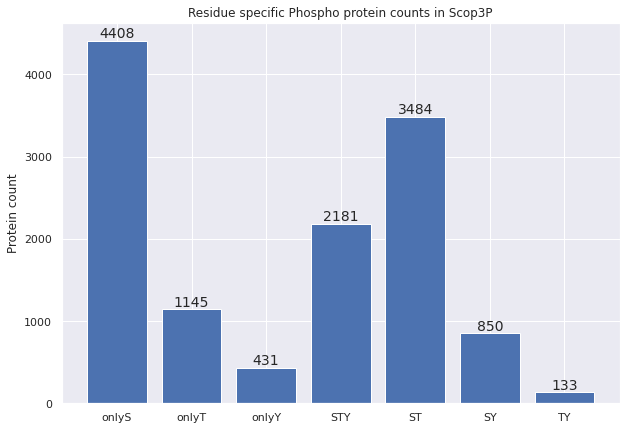

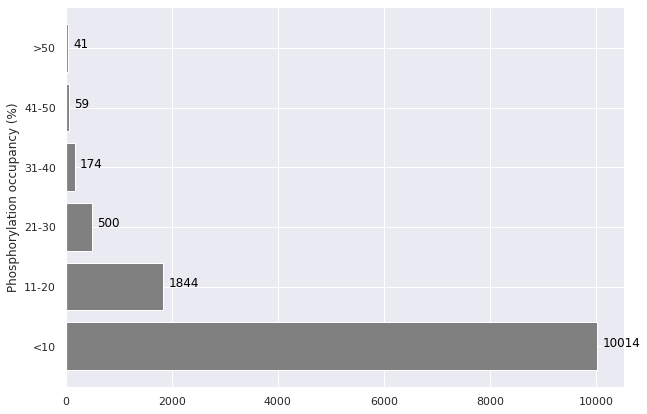

In [36]:
Scop3P_prot=Scop3P_confident_Sites[['ACC_ID','#pS','#pT','#pY','Perc.Psites']].drop_duplicates()
print (Scop3P_prot.shape)
onlyS=Scop3P_prot[(Scop3P_prot['#pT']==0)&(Scop3P_prot['#pY']==0)]
print (onlyS.shape)
onlyT=Scop3P_prot[(Scop3P_prot['#pS']==0)&(Scop3P_prot['#pY']==0)]
onlyY=Scop3P_prot[(Scop3P_prot['#pS']==0)&(Scop3P_prot['#pT']==0)]
noPhos=Scop3P_prot[(Scop3P_prot['#pT']==0)&(Scop3P_prot['#pY']==0)&(Scop3P_prot['#pS']==0)]
allPhos=Scop3P_prot[(Scop3P_prot['#pT']>0)&(Scop3P_prot['#pY']>0)&(Scop3P_prot['#pS']>0)]
STphos=Scop3P_prot[(Scop3P_prot['#pT']>0)&(Scop3P_prot['#pY']==0)&(Scop3P_prot['#pS']>0)]
SYphos=Scop3P_prot[(Scop3P_prot['#pT']==0)&(Scop3P_prot['#pY']>0)&(Scop3P_prot['#pS']>0)]
TYphos=Scop3P_prot[(Scop3P_prot['#pT']>0)&(Scop3P_prot['#pY']>0)&(Scop3P_prot['#pS']==0)]
plt.figure(figsize=(10,7))    ##Proteins_S_T_STY_percentage.png
plt.bar(['onlyS','onlyT','onlyY','STY','ST','SY','TY'],[onlyS.shape[0],\
                                                       onlyT.shape[0],onlyY.shape[0],allPhos.shape[0],\
                                                       STphos.shape[0],SYphos.shape[0],TYphos.shape[0]])
n=[onlyS.shape[0],onlyT.shape[0],onlyY.shape[0],allPhos.shape[0],STphos.shape[0],SYphos.shape[0],TYphos.shape[0]]
s=[i+20 for i in n]
print (n)
print (s)

for i in range(len(s)):
    ta=i
    plt.annotate(str(n[i]), xy=(i,n[i]), ha='center', va='bottom',fontsize=14)
    
plt.title('Residue specific Phospho protein counts in Scop3P')
plt.ylabel("Protein count")



print (noPhos.shape,allPhos.shape,onlyS.shape,onlyT.shape,onlyY.shape,STphos.shape,SYphos.shape,TYphos.shape)
##############################################################################################################
###############################################################################################################
Scop3P_prot['bin'] = pd.cut(Scop3P_prot['Perc.Psites'], [0, 10, 20,30,40,50,100], labels=['<10', '11-20', '21-30',\
                                                                                     '31-40','41-50','>50'])
Psiteval=Scop3P_prot.bin.value_counts().reset_index()
print (Psiteval)
plt.figure(figsize=(10,7))
plt.barh(['<10','11-20','21-30','31-40','41-50','>50'],Psiteval.bin,color='grey') #protein_bar_percentage.png

for i, v in enumerate(Psiteval.bin):
    plt.text(v + 100, i + .00, str(v), color='black', fontweight='regular',fontsize=12)
plt.ylabel('Phosphorylation occupancy (%)')


Text(0, 0.5, 'sites count')

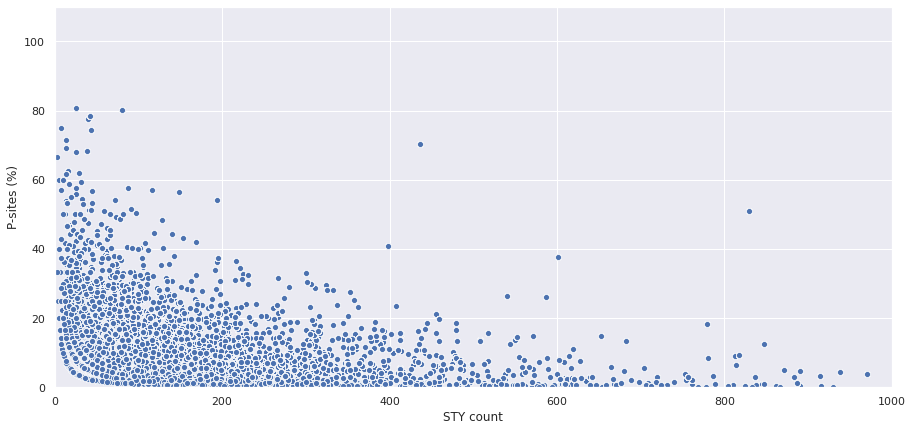

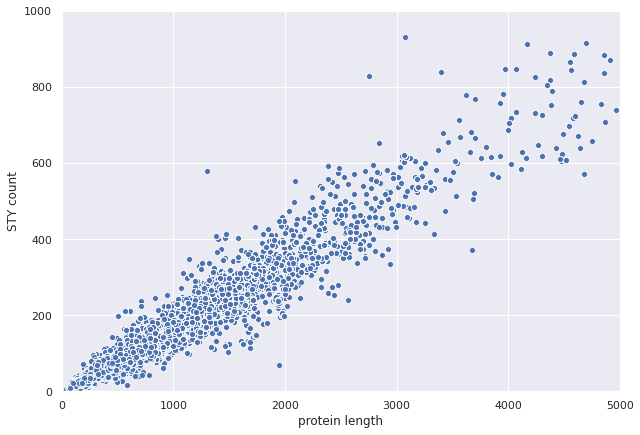

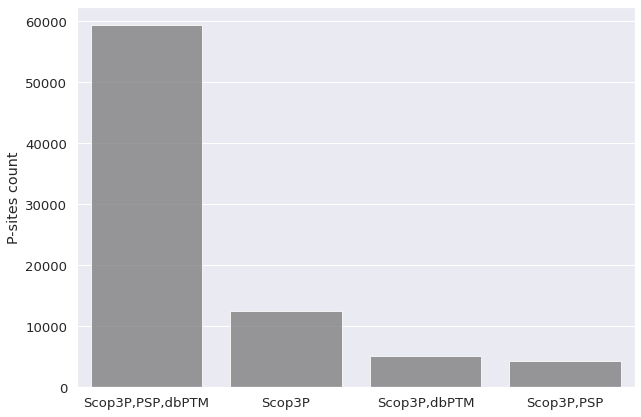

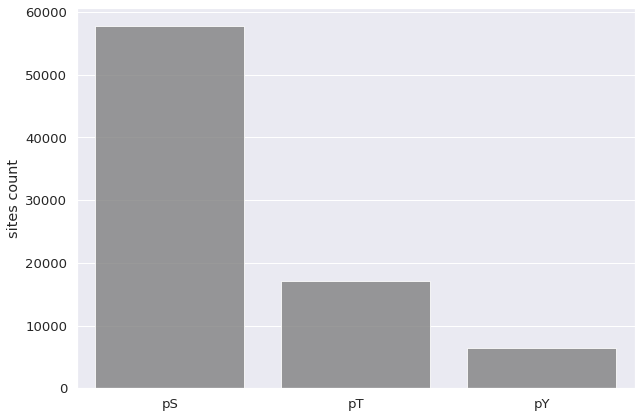

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='STY_count',y='Perc.Psites',data=Scop3P_confident_Sites)
plt.ylabel("P-sites (%)")
plt.xlabel("STY count")
plt.xlim(0,1000)
plt.ylim(0,110)


plt.figure(figsize=(10,7))
sns.scatterplot(x='SEQ_length',y='STY_count',data=Scop3P_confident_Sites)
plt.xlim(0,5000)
plt.ylim(0,1000)
plt.ylabel('STY count')
plt.xlabel('protein length')

plt.figure(figsize=(10,7))
dat=Scop3P_confident_Sites.DB.value_counts()
sns.set(font_scale=1.2)
sns.barplot(dat.index, dat.values, alpha=0.8,color='grey')
plt.ylabel('P-sites count')

plt.figure(figsize=(10,7))
dat=Scop3P_confident_Sites.Modification_name.value_counts()
sns.barplot(dat.index, dat.values, alpha=0.8,color='grey')
plt.xticks([0,1,2],['pS','pT','pY'])
plt.ylabel("sites count")

# Normalized protein sequence view

In [42]:
############################################################### Universal representation of Protein model
############################################################## Scale evrything to 1-100 length (protein length)
def rescale_len(row):
    maxval=row['SEQ_length']
    minval=1
    pos=row['UP_POS']
    scaled_pos=(pos-minval)/(maxval-minval)*100
    row['scaled_pos']=scaled_pos
    return row
Scop3P=Scop3P_confident_Sites.apply(rescale_len,axis=1)

Text(0.5, 0, 'normalized sequence position')

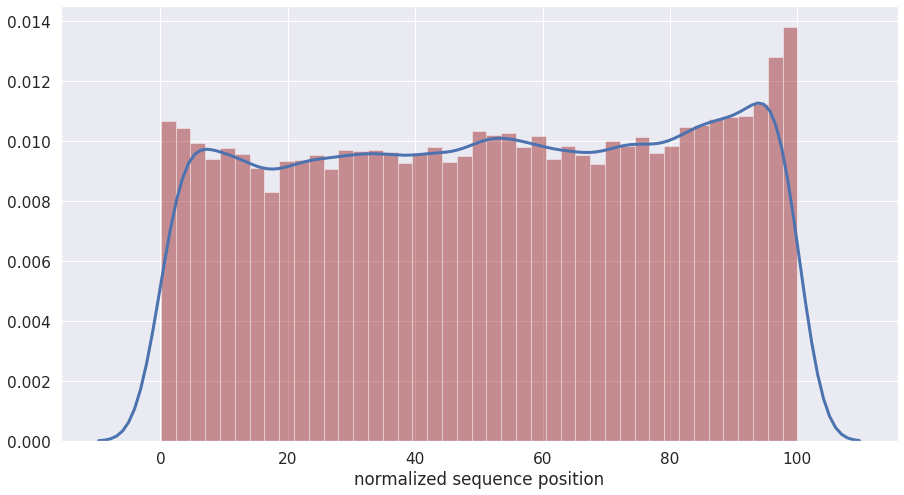

In [43]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,8))      

sns.distplot(Scop3P["scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")